<a href="https://colab.research.google.com/github/Gomez-Lab/WoundSizeEstimation/blob/main/Wound_Data_with_Error_Bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizations from CSV


## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Hector_MJ_Google_Drive/Numerical\ data

/content/drive/.shortcut-targets-by-id/175Vkdh2mGaZ7CZsZetvNssl0puand1tS/Hector_MJ_Google_Drive/Numerical data


In [ ]:
# Imports
import pandas as pd
import numpy as np # for calculating standard deviation and mean
import scipy.stats as sp # for calculating standard error
import matplotlib.pyplot as plt # for improving our visualizations

In [ ]:
def double_std(array):
 return np.std(array) * 2

## Post-processing comparisons

In [ ]:
data = pd.read_csv('Day Range Elimination (Percentage Closed).csv')

In [ ]:
data

,Mouse ID,Day,Side,Baseline (76% Splinted),No Splints 0-7 (27% Splinted),No Splints 1-8 (28% Splinted),No Splints 2-9 (29% Splinted),No Splints 3-10 (30% Splinted),No Splints 4-11 (33% Splinted),No Splints 5-12 (37% Splinted),No Splints 6-13 (41% Splinted),No Splints 7-14 (45% Splinted),No Splints 8-15 (49% Splinted)
0,A8-1,0,Right,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,A8-1,1,Right,-8.494,-13.490,-9.394,-8.494,-8.494,-8.494,-8.494,-8.494,-8.494,-8.494
2,A8-1,2,Right,-0.697,-5.336,-1.534,-1.534,-0.697,-0.697,-0.697,-0.697,-0.697,-0.697
3,A8-1,3,Right,3.717,-4.719,-0.940,-0.940,-0.940,3.717,3.717,3.717,3.717,3.717
4,A8-1,4,Right,6.659,7.507,10.845,10.845,10.845,8.052,6.659,6.659,6.659,6.659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Y8-4,11,Left,86.629,85.034,85.312,85.312,85.312,85.312,85.312,85.312,85.312,85.312
250,Y8-4,12,Left,91.774,91.279,91.441,91.441,91.441,91.171,91.171,91.449,91.449,91.893
251,Y8-4,13,Left,93.698,91.636,91.791,91.791,91.791,91.791,91.791,91.791,91.791,91.791
252,Y8-4,14,Left,95.621,95.538,95.621,95.621,95.621,95.482,95.482,95.625,95.625,95.853


In [ ]:
age = ["Aged"] * 127
young = ["Young"] * 127
age = age + young
data["Age"] = age
aggAge = data.groupby("Age").agg([np.mean, double_std, sp.sem])
aggAge

Day             ... No Splints 8-15 (49% Splinted)          
           mean double_std  ...                     double_std       sem
Age                         ...                                         
Aged   7.440945   9.158804  ...                      72.517568  3.230189
Young  7.440945   9.158804  ...                      85.660298  3.815613

[2 rows x 33 columns]

In [ ]:
agg = data.groupby(["Age", "Day"]).agg([np.mean, double_std, sp.sem])
agg.to_csv("error_results_ring_elimination.csv")
baseline = agg["Baseline (76% Splinted)"]
baseline_aged = baseline.head(16)
baseline_young = baseline.tail(16)

ring_07 = agg["No Splints 0-7 (27% Splinted)"]
aged_07 = ring_07.head(16)
young_07 = ring_07.tail(16)

ring_411 = agg["No Splints 4-11 (33% Splinted)"]
aged_411 = ring_411.head(16)
young_411 = ring_411.tail(16)


ring_815 = agg["No Splints 8-15 (49% Splinted)"]
aged_815 = ring_815.head(16)
young_815 = ring_815.tail(16)

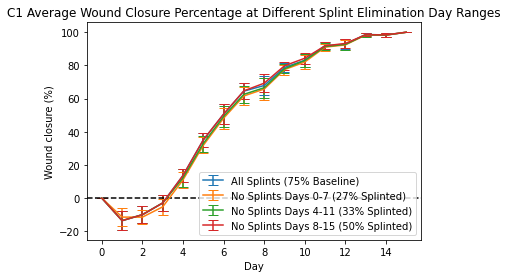

In [ ]:
fig, ax = plt.subplots()
title = "C1 Average Wound Closure Percentage at Different Splint Elimination Day Ranges"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, baseline_young["mean"], yerr=baseline_young["sem"], capsize=5.0, label="All Splints (75% Baseline)")
ax.errorbar(x, young_07["mean"], yerr=young_07["sem"], capsize=5.0, label="No Splints Days 0-7 (27% Splinted)")
ax.errorbar(x, young_411["mean"], yerr=young_411["sem"], capsize=5.0, label="No Splints Days 4-11 (33% Splinted)")
ax.errorbar(x, young_815["mean"], yerr=young_815["sem"], capsize=5.0, label="No Splints Days 8-15 (50% Splinted)")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='lower right')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

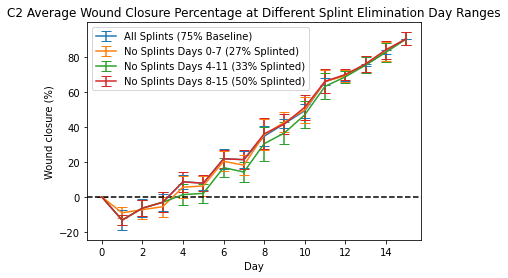

In [ ]:
fig, ax = plt.subplots()
title = "C2 Average Wound Closure Percentage at Different Splint Elimination Day Ranges"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, baseline_aged["mean"], yerr=baseline_young["sem"], capsize=5.0, label="All Splints (75% Baseline)")
ax.errorbar(x, aged_07["mean"], yerr=aged_07["sem"], capsize=5.0, label="No Splints Days 0-7 (27% Splinted)")
ax.errorbar(x, aged_411["mean"], yerr=aged_411["sem"], capsize=5.0, label="No Splints Days 4-11 (33% Splinted)")
ax.errorbar(x, aged_815["mean"], yerr=aged_815["sem"], capsize=5.0, label="No Splints Days 8-15 (50% Splinted)")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

###Ring search

In [ ]:
# Read data
data = pd.read_csv("Ring Search Experiment (percentage closed).csv")

In [ ]:
age = ["Aged"] * 127

In [ ]:
young = ["Young"] * 127

In [ ]:
age = age + young

In [ ]:
data["Age"] = age

In [ ]:
aggAge = data.groupby("Age").agg([np.mean, double_std, sp.sem])

In [ ]:
aggAge

Day                       ... Splints 50%                    
           mean double_std       sem  ...        mean double_std      sem
Age                                   ...                                
Aged   7.440945   9.158804  0.407966  ...   33.357874  73.197826  3.26049
Young  7.440945   9.158804  0.407966  ...   51.920102  85.836687  3.82347

[2 rows x 21 columns]

In [ ]:
agg = data.groupby(["Age", "Day"]).agg([np.mean, double_std, sp.sem])

In [ ]:
agg.to_csv("error_results_ring_search.csv")

In [ ]:
baseline = agg["Splints 75%"]

In [ ]:
baseline_aged = baseline.head(16)

In [ ]:
baseline_young = baseline.tail(16)

In [ ]:
ring_70 = agg["Splints 70%"]
aged_70 = ring_70.head(16)
young_70 = ring_70.tail(16)

In [ ]:
ring_65 = agg["Splints 65%"]
aged_65 = ring_65.head(16)
young_65 = ring_65.tail(16)

In [ ]:
ring_60 = agg["Splints 60%"]
aged_60 = ring_60.head(16)
young_60 = ring_60.tail(16)

In [ ]:
ring_55 = agg["Splints 55%"]
aged_55 = ring_55.head(16)
young_55 = ring_55.tail(16)

In [ ]:
ring_50 = agg["Splints 50%"]
aged_50 = ring_50.head(16)
young_50 = ring_50.tail(16)

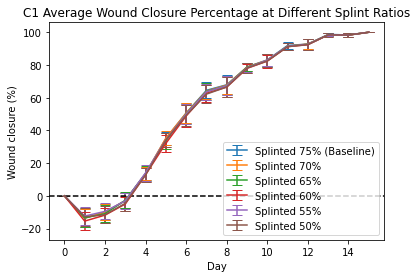

In [ ]:
fig, ax = plt.subplots()
title = "C1 Average Wound Closure Percentage at Different Splint Ratios"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, baseline_young["mean"], yerr=baseline_young["sem"], capsize=5.0, label="Splinted 75% (Baseline)")
ax.errorbar(x, young_70["mean"], yerr=young_70["sem"], capsize=5.0, label="Splinted 70%")
ax.errorbar(x, young_65["mean"], yerr=young_65["sem"], capsize=5.0, label="Splinted 65%")
ax.errorbar(x, young_60["mean"], yerr=young_60["sem"], capsize=5.0, label="Splinted 60%")
ax.errorbar(x, young_55["mean"], yerr=young_55["sem"], capsize=5.0, label="Splinted 55%")
ax.errorbar(x, young_50["mean"], yerr=young_50["sem"], capsize=5.0, label="Splinted 50%")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='lower right')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

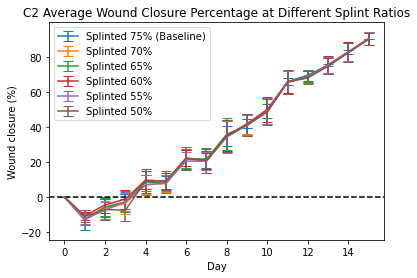

In [ ]:
fig, ax = plt.subplots()
title = "C2 Average Wound Closure Percentage at Different Splint Ratios"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, baseline_aged["mean"], yerr=baseline_young["sem"], capsize=5.0, label="Splinted 75% (Baseline)")
ax.errorbar(x, aged_70["mean"], yerr=aged_70["sem"], capsize=5.0, label="Splinted 70%")
ax.errorbar(x, aged_65["mean"], yerr=aged_65["sem"], capsize=5.0, label="Splinted 65%")
ax.errorbar(x, aged_60["mean"], yerr=aged_60["sem"], capsize=5.0, label="Splinted 60%")
ax.errorbar(x, aged_55["mean"], yerr=aged_55["sem"], capsize=5.0, label="Splinted 55%")
ax.errorbar(x, aged_50["mean"], yerr=aged_50["sem"], capsize=5.0, label="Splinted 50%")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

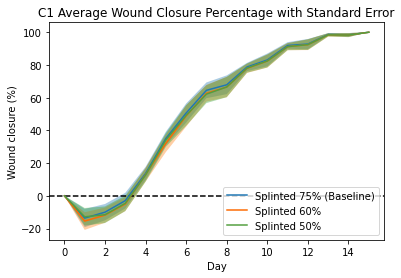

In [ ]:
fig, ax = plt.subplots()
title = "C1 Average Wound Closure Percentage with Standard Error"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

model_y_y = baseline_young["mean"]
model_y_y_err = baseline_young["sem"]
model_y_y_err[15] = 0

ax.axhline(y=0, color='black', linestyle='dashed')

ax.plot(x, model_y_y, label="Splinted 75% (Baseline)")
ax.errorbar(x, model_y_y, yerr = model_y_y_err, alpha = 0.0)
ax.fill_between(x, model_y_y - model_y_y_err, model_y_y + model_y_y_err, alpha=0.375)

manual_y_y = young_60["mean"]
manual_y_y_err = young_60["sem"]
manual_y_y_err[15] = 0

ax.plot(x, manual_y_y, color='#fd6a02', label="Splinted 60%")
ax.errorbar(x, manual_y_y, yerr = manual_y_y_err, alpha = 0.0)
ax.fill_between(x, manual_y_y - manual_y_y_err, manual_y_y + manual_y_y_err, alpha=0.375)

expert_y_y = young_50["mean"]
expert_y_y_err = young_50["sem"]
expert_y_y_err[15] = 0

ax.plot(x, expert_y_y, color='#529f3f', label="Splinted 50%")
ax.errorbar(x, expert_y_y, yerr = expert_y_y_err, alpha = 0.0)
ax.fill_between(x, expert_y_y - expert_y_y_err, expert_y_y + expert_y_y_err, alpha=0.375)


plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='lower right')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + "(Bands).pdf")
plt.show()

### Average substitution

In [ ]:
data = pd.read_csv("Average Change Experiment (percentage closed).csv")

In [ ]:
age = ["Aged"] * 127
young = ["Young"] * 127
age = age + young
data["Age"] = age
aggAge = data.groupby("Age").agg([np.mean, double_std, sp.sem])
aggAge

Day                       ... Splints 50%                     
           mean double_std       sem  ...        mean double_std       sem
Age                                   ...                                 
Aged   7.440945   9.158804  0.407966  ...    32.05474  79.971621  3.562219
Young  7.440945   9.158804  0.407966  ...    53.02026  83.648681  3.726008

[2 rows x 21 columns]

In [ ]:
agg = data.groupby(["Age", "Day"]).agg([np.mean, double_std, sp.sem])
agg.to_csv("error_results_avg_substitution.csv")

In [ ]:
baseline = agg["Splints 75%"]
baseline_aged = baseline.head(16)
baseline_young = baseline.tail(16)

In [ ]:
ring_70 = agg["Splints 70%"]
aged_70 = ring_70.head(16)
young_70 = ring_70.tail(16)

ring_65 = agg["Splints 65%"]
aged_65 = ring_65.head(16)
young_65 = ring_65.tail(16)

ring_60 = agg["Splints 60%"]
aged_60 = ring_60.head(16)
young_60 = ring_60.tail(16)

ring_55 = agg["Splints 55%"]
aged_55 = ring_55.head(16)
young_55 = ring_55.tail(16)

ring_50 = agg["Splints 50%"]
aged_50 = ring_50.head(16)
young_50 = ring_50.tail(16)

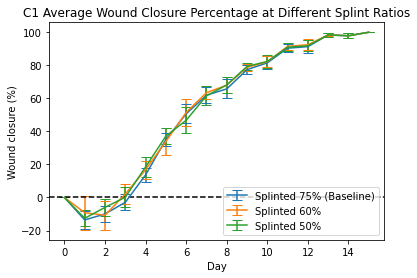

In [ ]:
fig, ax = plt.subplots()
title = "C1 Average Wound Closure Percentage at Different Splint Ratios"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, baseline_young["mean"], yerr=baseline_young["sem"], capsize=5.0, label="Splinted 75% (Baseline)")
#ax.errorbar(x, young_70["mean"], yerr=young_70["sem"], capsize=5.0, label="Splinted 70%")
#ax.errorbar(x, young_65["mean"], yerr=young_65["sem"], capsize=5.0, label="Splinted 65%")
ax.errorbar(x, young_60["mean"], yerr=young_60["sem"], capsize=5.0, label="Splinted 60%")
#ax.errorbar(x, young_55["mean"], yerr=young_55["sem"], capsize=5.0, label="Splinted 55%")
ax.errorbar(x, young_50["mean"], yerr=young_50["sem"], capsize=5.0, label="Splinted 50%")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='lower right')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + " (Avg Substitution).pdf")
plt.show()

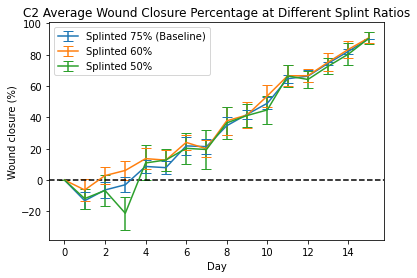

In [ ]:
fig, ax = plt.subplots()
title = "C2 Average Wound Closure Percentage at Different Splint Ratios"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, baseline_aged["mean"], yerr=baseline_young["sem"], capsize=5.0, label="Splinted 75% (Baseline)")
#ax.errorbar(x, aged_70["mean"], yerr=aged_70["sem"], capsize=5.0, label="Splinted 70%")
#ax.errorbar(x, aged_65["mean"], yerr=aged_65["sem"], capsize=5.0, label="Splinted 65%")
ax.errorbar(x, aged_60["mean"], yerr=aged_60["sem"], capsize=5.0, label="Splinted 60%")
#ax.errorbar(x, aged_55["mean"], yerr=aged_55["sem"], capsize=5.0, label="Splinted 55%")
ax.errorbar(x, aged_50["mean"], yerr=aged_50["sem"], capsize=5.0, label="Splinted 50%")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + " (avg substitution).pdf")
plt.show()

## Dataset 1

In [ ]:
# Read data
data = pd.read_csv("Dataset 1 - Post-processed Manual_Automatic + Expert 1_2 percentages v2 Michelle.csv")

In [ ]:
age = ["Aged"] * 128

In [ ]:
young = ["Young"] * 128

In [ ]:
age = age + young

In [ ]:
data["Age"] = age

In [ ]:
# df.groupby("col_to_group_by").agg([func_1, func_2, func_3])
aggAge = data.groupby("Age").agg([np.mean, double_std, sp.sem])

In [ ]:
aggAge

Day             ... Expert 2 Closure percentage %          
      mean double_std  ...                    double_std       sem
Age                    ...                                        
Aged   7.5   9.219544  ...                     72.744549  3.227517
Young  7.5   9.219544  ...                     84.025058       NaN

[2 rows x 27 columns]

In [ ]:
agg = data.groupby(["Age", "Day"]).agg([np.mean, double_std, sp.sem])

In [ ]:
agg

Manual area mm^2             ... Expert 2 Closure percentage %          
                      mean double_std  ...                    double_std       sem
Age   Day                              ...                                        
Aged  0          26.391750   8.135037  ...                      0.000000  0.000000
      1          29.700375   8.326816  ...                     22.894603  4.326673
      2          26.730000   9.234516  ...                     27.701281  5.235050
      3          24.995250   8.863687  ...                     35.185705  6.649473
      4          23.485625   8.433113  ...                     25.654560  4.848256
      5          21.779875   7.279061  ...                     28.505296  5.386995
      6          19.165375   6.603676  ...                     27.363834  5.171278
      7          19.169500   6.880363  ...                     20.160820  3.810037
      8          15.676000  11.344118  ...                     21.218522  4.009924
      9          14.192375   9.779731  ...                     17.026796  3.217762
      10         10.505500   8.770798  ...                     23.670792  4.473359
      11          8.145375  10.292826  ...                     13.431684  2.538350
      12          6.546375   5.643547  ...                      6.078775  1.148780
      13          5.321375   6.265077  ...                      3.368241  0.636538
      14          3.278875   6.681714  ...                      1.983953  0.374932
      15          1.804429   3.462150  ...                      1.440318  0.272195
Young 0          24.304250   9.375538  ...                      0.000000  0.000000
      1          27.811750   7.164157  ...                     26.523650  5.012499
      2          26.636625   6.879478  ...                     30.606703  5.784123
      3          24.036750   6.757986  ...                     43.204201  8.164827
      4          20.447625   6.774518  ...                     34.844022  6.584901
      5          14.377000   8.422135  ...                     15.391283  2.908679
      6          10.710375   7.947640  ...                     26.735768  5.052585
      7           8.256500   8.402901  ...                     14.442082  2.729297
      8           7.811625   9.497208  ...                     10.627564  2.008421
      9           4.917125   5.018600  ...                      4.293309       NaN
      10          4.084500   6.387333  ...                      3.364766  0.635881
      11          1.734125   4.142656  ...                      2.592721  0.489978
      12          1.624375   3.260198  ...                      2.274491  0.429838
      13          0.268125   0.739710  ...                      0.969270  0.183175
      14          0.088125   0.338607  ...                      0.326262  0.061658
      15          0.000000   0.000000  ...                      0.132141  0.024972

[32 rows x 24 columns]

In [ ]:
agg.to_csv("error_results_dataset1.csv")

In [ ]:
model_closure = agg["Closure percentage %"]

In [ ]:
model_aged = model_closure.head(16)

In [ ]:
model_young = model_closure.tail(16)

In [ ]:
model_aged

mean  double_std       sem
Age  Day                                 
Aged 0     0.000000    0.000000  0.000000
     1   -13.245125   15.774626  2.981124
     2    -6.397000   23.791319  4.496137
     3    -3.053750   29.934719  5.657130
     4     8.632375   29.357273  5.548003
     5     7.855375   25.090130  4.741589
     6    21.765875   27.774483  5.248884
     7    21.302125   28.832481  5.448827
     8    34.648625   47.901918  9.052612
     9    41.892750   30.562426  5.775756
     10   49.005750   37.953550  7.172547
     11   64.690000   34.281463  6.478588
     12   66.327375   18.104168  3.421366
     13   74.580500   24.826322  4.691734
     14   82.218500   28.477837  5.381805
     15   90.268857   18.050306       NaN

In [ ]:
manual_closure = agg["Manual Closure percentage %"]
manual_aged = manual_closure.head(16)
manual_young = manual_closure.tail(16)

In [ ]:
manual_aged

mean  double_std       sem
Age  Day                                 
Aged 0     0.000000    0.000000  0.000000
     1   -13.151043   18.875032  3.567046
     2    -1.851168   24.559973       NaN
     3     4.359514   30.959823  5.850857
     4    10.289941   27.828630  5.259117
     5    16.207266   30.977788  5.854252
     6    26.141104   29.454298  5.566339
     7    25.905618   33.586187  6.347193
     8    39.215851   51.584913  9.748632
     9    46.187449   32.202855  6.085768
     10   60.512100   27.823979  5.258238
     11   69.099919   35.375429  6.685328
     12   74.794955   21.236551  4.013331
     13   82.348337   27.713227  5.237308
     14   87.773511   26.178139  4.947203
     15   93.810081   12.019320       NaN

In [ ]:
expert_1 = agg["Expert 1 Closure percentage %"]
expert_1_aged = expert_1.head(16)
expert_1_young = expert_1.tail(16)

In [ ]:
expert_1_aged

mean  double_std        sem
Age  Day                                  
Aged 0     0.000000    0.000000   0.000000
     1    -9.278249   25.957588   4.905523
     2    -6.029024   33.685530   6.365967
     3     4.500473   37.469704   7.081108
     4    11.888979   29.848433   5.640824
     5    25.085221   35.656858   6.738513
     6    33.690359   37.844377   7.151915
     7    37.695720   43.355754   8.193467
     8    46.800723   62.226966  11.759791
     9    63.134747   45.919854   8.678037
     10   71.365644   32.818015   6.202022
     11   80.984783   35.569947   6.722088
     12   89.675052   14.935345   2.822515
     13   90.558341   11.119154   2.101323
     14   95.368100    6.345649   1.199215
     15   98.069778    3.899431   0.736923

In [ ]:
expert_2 = agg["Expert 2 Closure percentage %"]
expert_2_aged = expert_2.head(16)
expert_2_young = expert_2.tail(16)

In [ ]:
expert_2_aged

mean  double_std       sem
Age  Day                                 
Aged 0     0.000000    0.000000  0.000000
     1    -2.105277   22.894603  4.326673
     2     7.892377   27.701281  5.235050
     3    13.798538   35.185705  6.649473
     4    45.024778   25.654560  4.848256
     5    55.491618   28.505296  5.386995
     6    57.676430   27.363834  5.171278
     7    62.094258   20.160820  3.810037
     8    68.548135   21.218522  4.009924
     9    74.397610   17.026796  3.217762
     10   79.913986   23.670792  4.473359
     11   89.226064   13.431684  2.538350
     12   94.263476    6.078775  1.148780
     13   96.809768    3.368241  0.636538
     14   97.406466    1.983953  0.374932
     15   98.742848    1.440318  0.272195

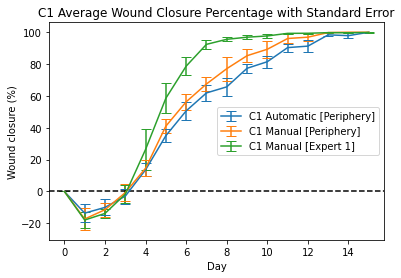

In [ ]:
fig, ax = plt.subplots()
title = "C1 Average Wound Closure Percentage with Standard Error"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, model_young["mean"], yerr=model_young["sem"], capsize=5.0, label="C1 Automatic [Periphery]")
ax.errorbar(x, manual_young["mean"], yerr=manual_young["sem"], capsize=5.0, label="C1 Manual [Periphery]")
ax.errorbar(x, expert_1_young["mean"], yerr=expert_1_young["sem"], capsize=5.0, label="C1 Manual [Expert 1]")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='center right')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

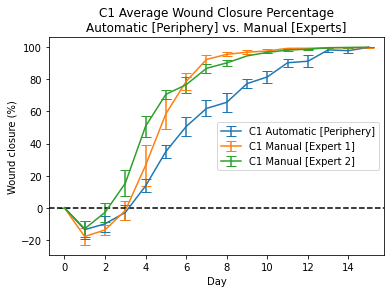

In [ ]:
fig, ax = plt.subplots()
title = "C1 Average Wound Closure Percentage\nAutomatic [Periphery] vs. Manual [Experts]"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, model_young["mean"], yerr=model_young["sem"], capsize=5.0, label="C1 Automatic [Periphery]")
#ax.errorbar(x, manual_young["mean"], yerr=manual_young["sem"], capsize=5.0, label="C1 Manual [Periphery]")
ax.errorbar(x, expert_1_young["mean"], yerr=expert_1_young["sem"], capsize=5.0, label="C1 Manual [Expert 1]")
ax.errorbar(x, expert_2_young["mean"], yerr=expert_2_young["sem"], capsize=5.0, label="C1 Manual [Expert 2]")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='center right')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + "Averages 2 Experts C1" + ".pdf")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


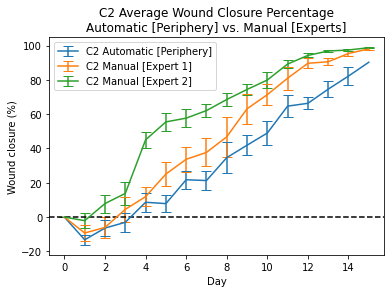

In [ ]:
fig, ax = plt.subplots()
title = "C2 Average Wound Closure Percentage\nAutomatic [Periphery] vs. Manual [Experts]"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, model_aged["mean"], yerr=model_aged["sem"], capsize=5.0, label="C2 Automatic [Periphery]")
#ax.errorbar(x, manual_young["mean"], yerr=manual_young["sem"], capsize=5.0, label="C2 Manual [Periphery]")
ax.errorbar(x, expert_1_aged["mean"], yerr=expert_1_aged["sem"], capsize=5.0, label="C2 Manual [Expert 1]")
ax.errorbar(x, expert_2_aged["mean"], yerr=expert_2_aged["sem"], capsize=5.0, label="C2 Manual [Expert 2]")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='top left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + "Average 2 Experts C2" + ".pdf")
plt.show()

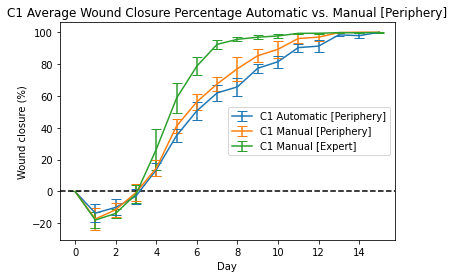

In [ ]:
fig, ax = plt.subplots()
title = "C1 Average Wound Closure Percentage Automatic vs. Manual [Periphery]"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, model_young["mean"], yerr=model_young["sem"], capsize=5.0, label="C1 Automatic [Periphery]")
ax.errorbar(x, manual_young["mean"], yerr=manual_young["sem"], capsize=5.0, label="C1 Manual [Periphery]")
ax.errorbar(x, expert_young["mean"], yerr=expert_young["sem"], capsize=5.0, label="C1 Manual [Expert]")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='center right')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

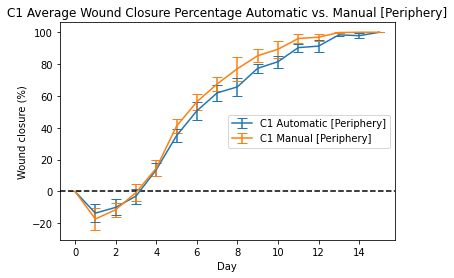

In [ ]:
fig, ax = plt.subplots()
title = "C1 Average Wound Closure Percentage Automatic vs. Manual [Periphery]"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, model_young["mean"], yerr=model_young["sem"], capsize=5.0, label="C1 Automatic [Periphery]")
ax.errorbar(x, manual_young["mean"], yerr=manual_young["sem"], capsize=5.0, label="C1 Manual [Periphery]")
#ax.errorbar(x, expert_young["mean"], yerr=expert_young["sem"], capsize=5.0, label="C1 Manual [Expert]")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='center right')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

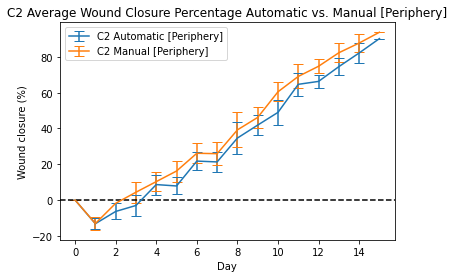

In [ ]:
fig, ax = plt.subplots()
title = "C2 Average Wound Closure Percentage Automatic vs. Manual [Periphery]"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, model_aged["mean"], yerr=model_aged["sem"], capsize=5.0, label="C2 Automatic [Periphery]")
ax.errorbar(x, manual_aged["mean"], yerr=manual_aged["sem"], capsize=5.0, label="C2 Manual [Periphery]")
#ax.errorbar(x, expert_aged["mean"], yerr=expert_aged["sem"], capsize=5.0, label="C2 Manual [Expert]")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend()
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

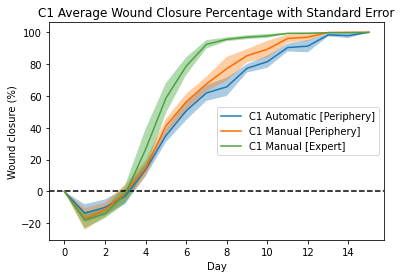

In [ ]:
fig, ax = plt.subplots()
title = "C1 Average Wound Closure Percentage with Standard Error"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

model_y_y = model_young["mean"]
model_y_y_err = model_young["sem"]
model_y_y_err[15] = 0

ax.axhline(y=0, color='black', linestyle='dashed')

ax.plot(x, model_y_y, label="C1 Automatic [Periphery]")
ax.errorbar(x, model_y_y, yerr = model_y_y_err, alpha = 0.0)
ax.fill_between(x, model_y_y - model_y_y_err, model_y_y + model_y_y_err, alpha=0.375)

manual_y_y = manual_young["mean"]
manual_y_y_err = manual_young["sem"]
manual_y_y_err[15] = 0

ax.plot(x, manual_y_y, color='#fd6a02', label="C1 Manual [Periphery]")
ax.errorbar(x, manual_y_y, yerr = manual_y_y_err, alpha = 0.0)
ax.fill_between(x, manual_y_y - manual_y_y_err, manual_y_y + manual_y_y_err, alpha=0.375)

expert_y_y = expert_young["mean"]
expert_y_y_err = expert_young["sem"]
expert_y_y_err[15] = 0

ax.plot(x, expert_y_y, color='#529f3f', label="C1 Manual [Expert]")
ax.errorbar(x, expert_y_y, yerr = expert_y_y_err, alpha = 0.0)
ax.fill_between(x, expert_y_y - expert_y_y_err, expert_y_y + expert_y_y_err, alpha=0.375)


plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='center right')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + "(Bands).pdf")
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

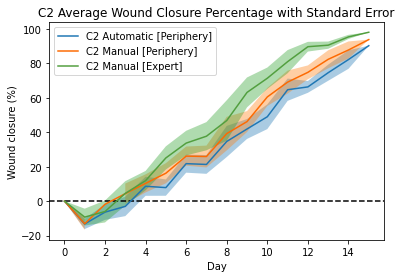

In [ ]:
fig, ax = plt.subplots()
title = "C2 Average Wound Closure Percentage with Standard Error"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

model_y_y = model_aged["mean"]
model_y_y_err = model_aged["sem"]
model_y_y_err[15] = 0

ax.axhline(y=0, color='black', linestyle='dashed')

ax.plot(x, model_y_y, label="C2 Automatic [Periphery]")
ax.errorbar(x, model_y_y, yerr = model_y_y_err, alpha = 0.0)
ax.fill_between(x, model_y_y - model_y_y_err, model_y_y + model_y_y_err, alpha=0.375)

manual_y_y = manual_aged["mean"]
manual_y_y_err = manual_aged["sem"]
manual_y_y_err[15] = 0

ax.plot(x, manual_y_y, color='#fd6a02', label="C2 Manual [Periphery]")
ax.errorbar(x, manual_y_y, yerr = manual_y_y_err, alpha = 0.0)
ax.fill_between(x, manual_y_y - manual_y_y_err, manual_y_y + manual_y_y_err, alpha=0.375)

expert_y_y = expert_aged["mean"]
expert_y_y_err = expert_aged["sem"]
expert_y_y_err[15] = 0

ax.plot(x, expert_y_y, color='#529f3f', label="C2 Manual [Expert]")
ax.errorbar(x, expert_y_y, yerr = expert_y_y_err, alpha = 0.0)
ax.fill_between(x, expert_y_y - expert_y_y_err, expert_y_y + expert_y_y_err, alpha=0.375)


plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + "(Bands).pdf")
plt.show()

NameError: ignored

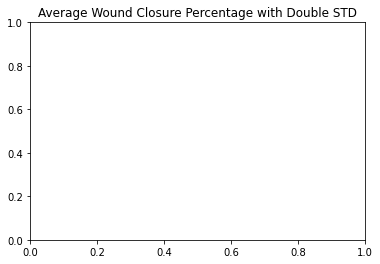

In [ ]:
fig, ax = plt.subplots()
title = "Average Wound Closure Percentage with Double STD"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

ax.errorbar(x, aged["mean"], yerr=aged["double_std"], label="Aged")
ax.errorbar(x, young["mean"], yerr=young["double_std"], label="Young")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

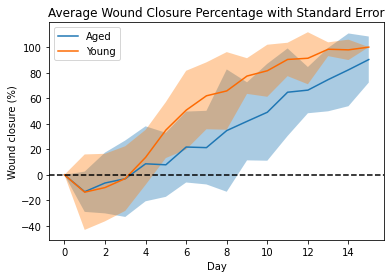

In [ ]:
fig, ax = plt.subplots()
title = "Average Wound Closure Percentage with Standard Error"
plt.title(title)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y_a = aged["mean"]
y_a_err = aged["double_std"]
#y_a_err[15] = 0

y_y = young["mean"]
y_y_err = young["double_std"]
#y_y_err[15] = 0

ax.plot(x, y_a)
ax.errorbar(x, y_a, yerr = y_a_err, alpha = 0.0)
ax.fill_between(x, y_a - y_a_err, y_a + y_a_err, alpha=0.375)

ax.plot(x, y_y, color='#fd6a02')
ax.errorbar(x, y_y, yerr = y_y_err, alpha = 0.0)
ax.fill_between(x, y_y - y_y_err, y_y + y_y_err, alpha=0.375)


ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(('Aged', 'Young'))
#plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + "(Bands).pdf")
plt.show()

##Dataset 2

In [ ]:
# Read data
data = pd.read_csv("Splinted_Unsplinted wound data.csv")

In [ ]:
age = ["Aged"] * 80

In [ ]:
young = ["Young"] * 80

In [ ]:
age = age + young

In [ ]:
data["Age"] = age

In [ ]:
aggAge = data.groupby("Age").agg([np.mean, double_std, sp.sem])

In [ ]:
aggAge

Day                      ... Closure percentage                     
      mean double_std      sem  ...               mean double_std       sem
Age                             ...                                        
Aged   3.5   4.582576  0.25779  ...          13.348313  37.611883  2.115834
Young  3.5   4.582576  0.25779  ...          20.759600  39.139085  2.201746

[2 rows x 12 columns]

In [ ]:
agg = data.groupby(["Age", "Day"]).agg([np.mean, double_std, sp.sem])

In [ ]:
agg

Predicted area             ... Closure percentage          
                    mean double_std  ...         double_std       sem
Age   Day                            ...                             
Aged  0          58.7040  28.164400  ...           0.000000  0.000000
      1          57.0718  23.423695  ...          28.345924  4.724321
      2          51.2964  15.542043  ...          35.767579  5.961263
      3          49.4527  15.049477  ...          35.356517  5.892753
      4          49.6872  20.236386  ...          32.228898  5.371483
      5          50.0846  23.792614  ...          33.978831  5.663138
      6          42.5417  25.397144  ...          35.413842  5.902307
      7          38.0843  20.666699  ...          30.074972  5.012495
Young 0          54.2735  20.108783  ...           0.000000  0.000000
      1          46.9862   6.619829  ...          29.185988  4.864331
      2          45.4310   7.023174  ...          29.102602  4.850434
      3          46.6125   6.207468  ...          29.230861  4.871810
      4          43.5067  10.021172  ...          21.561828  3.593638
      5          39.1450  20.376060  ...          30.398658  5.066443
      6          33.3873  18.953673  ...          32.934272  5.489045
      7          29.5887  18.279830  ...          27.984474  4.664079

[16 rows x 9 columns]

In [ ]:
agg.to_csv("Dataset 2 - Mean, Double STD, Standard Error.csv")

In [ ]:
closure = agg["Closure percentage"]

In [ ]:
aged = closure.head(8)

In [ ]:
young = closure.tail(8)

In [ ]:
aged

mean  double_std       sem
Age  Day                               
Aged 0     0.0000    0.000000  0.000000
     1     0.8236   28.345924  4.724321
     2     9.1437   35.767579  5.961263
     3    12.2247   35.356517  5.892753
     4    12.8398   32.228898  5.371483
     5    12.6262   33.978831  5.663138
     6    25.8611   35.413842  5.902307
     7    33.2674   30.074972  5.012495

In [ ]:
young

mean  double_std       sem
Age   Day                               
Young 0     0.0000    0.000000  0.000000
      1    11.0192   29.185988  4.864331
      2    13.9827   29.102602  4.850434
      3    11.7062   29.230861  4.871810
      4    18.3966   21.561828  3.593638
      5    27.5557   30.398658  5.066443
      6    37.9634   32.934272  5.489045
      7    45.4530   27.984474  4.664079

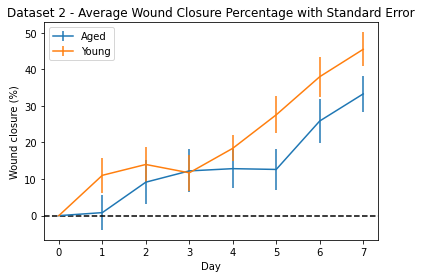

In [ ]:
fig, ax = plt.subplots()
title = "Dataset 2 - Average Wound Closure Percentage with Standard Error"
plt.title(title)
x = [0,1,2,3,4,5,6,7]

ax.errorbar(x, aged["mean"], yerr=aged["sem"], label="Aged")
ax.errorbar(x, young["mean"], yerr=young["sem"], label="Young")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

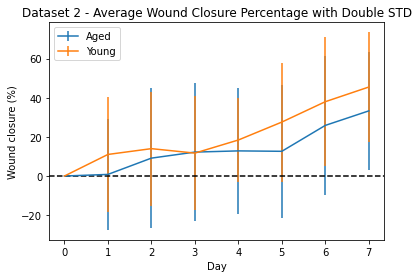

In [ ]:
fig, ax = plt.subplots()
title = "Dataset 2 - Average Wound Closure Percentage with Double STD"
plt.title(title)
x = [0,1,2,3,4,5,6,7]

ax.errorbar(x, aged["mean"], yerr=aged["double_std"], label="Aged")
ax.errorbar(x, young["mean"], yerr=young["double_std"], label="Young")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

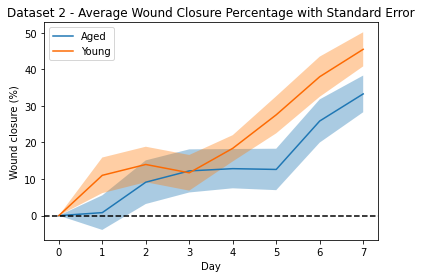

In [ ]:
fig, ax = plt.subplots()
title = "Dataset 2 - Average Wound Closure Percentage with Standard Error"
plt.title(title)
x = [0,1,2,3,4,5,6,7]
y_a = aged["mean"]
y_a_err = aged["sem"]
#y_a_err[15] = 0
#y_y_err[15] = 0

y_y = young["mean"]
y_y_err = young["sem"]

ax.plot(x, y_a)
ax.errorbar(x, y_a, yerr = y_a_err, alpha = 0.0)
ax.fill_between(x, y_a - y_a_err, y_a + y_a_err, alpha=0.375)

ax.plot(x, y_y, color='#fd6a02')
ax.errorbar(x, y_y, yerr = y_y_err, alpha = 0.0)
ax.fill_between(x, y_y - y_y_err, y_y + y_y_err, alpha=0.375)


ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(('Aged', 'Young'))
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + "(Bands).pdf")
plt.show()

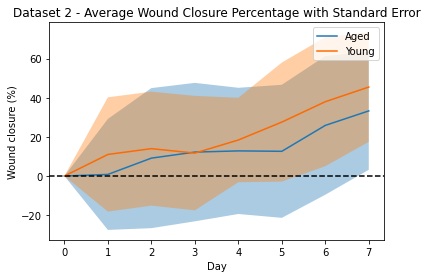

In [ ]:
fig, ax = plt.subplots()
title = "Dataset 2 - Average Wound Closure Percentage with Standard Error"
plt.title(title)
x = [0,1,2,3,4,5,6,7]
y_a = aged["mean"]
y_a_err = aged["double_std"]
#y_a_err[15] = 0

y_y = young["mean"]
y_y_err = young["double_std"]
#y_y_err[15] = 0

ax.plot(x, y_a)
ax.errorbar(x, y_a, yerr = y_a_err, alpha = 0.0)
ax.fill_between(x, y_a - y_a_err, y_a + y_a_err, alpha=0.375)

ax.plot(x, y_y, color='#fd6a02')
ax.errorbar(x, y_y, yerr = y_y_err, alpha = 0.0)
ax.fill_between(x, y_y - y_y_err, y_y + y_y_err, alpha=0.375)


ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(('Aged', 'Young'))
#plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + "(Bands).pdf")
plt.show()

###All - Splinted vs Unsplinted

In [ ]:
aggSide = data.groupby(["Day", "Side"]).agg([np.mean, double_std, sp.sem])

In [ ]:
aggSide

Predicted area             ... Closure percentage          
                   mean double_std  ...         double_std       sem
Day Side                            ...                             
0   S           45.9136   5.596680  ...           0.000000  0.000000
    U           67.0639  17.631279  ...           0.000000  0.000000
1   S           47.0104   4.954898  ...          13.862929  2.310488
    U           57.0476  23.872337  ...          32.870877  5.478480
2   S           45.5885   7.391590  ...          21.723026  3.620504
    U           51.1389  15.602449  ...          26.032929  4.338821
3   S           45.8883   6.034544  ...          15.073659  2.512276
    U           50.1769  14.420575  ...          26.375985  4.395998
4   S           41.8293   8.290124  ...          18.704861  3.117477
    U           51.3646  18.323819  ...          28.780391  4.796732
5   S           38.4691  13.616110  ...          29.126104  4.854351
    U           50.7605  27.075202  ...          39.288005  6.548001
6   S           32.9377  13.557313  ...          29.403673  4.900612
    U           42.9913  28.034126  ...          40.618653  6.769776
7   S           28.8724  12.957640  ...          28.821562  4.803594
    U           38.8006  23.250298  ...          33.223634  5.537272

[16 rows x 9 columns]

In [ ]:
closureSide = aggSide["Closure percentage"]

In [ ]:
closureSide.to_csv("closureSide.csv")

In [ ]:
readSide = pd.read_csv("closureSide.csv")

In [ ]:
splinted = readSide.loc[readSide["Side"] == "S"]

In [ ]:
unsplinted = readSide.loc[readSide["Side"] == "U"]

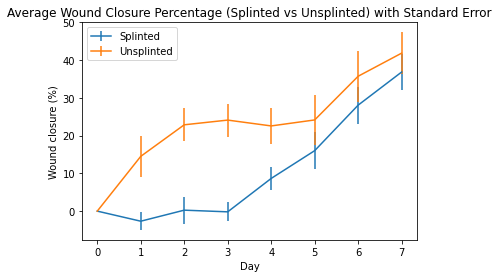

In [ ]:
fig, ax = plt.subplots()
title = "Average Wound Closure Percentage (Splinted vs Unsplinted) with Standard Error"
plt.title(title)
x = [0,1,2,3,4,5,6,7]

ax.errorbar(x, splinted["mean"], yerr=splinted["sem"], label="Splinted")
ax.errorbar(x, unsplinted["mean"], yerr=unsplinted["sem"], label="Unsplinted")

#ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + ".pdf")
plt.show()

###Splinted - Aged vs Young

In [ ]:
allSplinted = data.loc[data["Side"] == "S"]

In [ ]:
allSplinted

,Mouse ID,Day,Side,Predicted area,Predicted diameter,Closure percentage,Age
0,A6-1,0,S,47.014,7.737,0.000,Aged
2,A6-1,1,S,47.747,7.797,-1.589,Aged
4,A6-1,2,S,46.540,7.698,0.979,Aged
6,A6-1,3,S,47.673,7.791,-1.432,Aged
8,A6-1,4,S,47.985,7.816,-2.096,Aged
...,...,...,...,...,...,...,...
150,Y6-5,3,S,48.984,7.897,-13.752,Young
152,Y6-5,4,S,38.883,7.036,9.705,Young
154,Y6-5,5,S,29.699,6.149,31.032,Young
156,Y6-5,6,S,22.672,5.373,47.350,Young


In [ ]:
aggSplinted = allSplinted.groupby(["Age", "Day"]).agg([np.mean, double_std, sp.sem])

In [ ]:
aggSplinted

Predicted area             ... Closure percentage          
                    mean double_std  ...         double_std       sem
Age   Day                            ...                             
Aged  0          45.6702   5.886258  ...           0.000000  0.000000
      1          47.8622   3.935755  ...           8.361408  2.090352
      2          46.8546   7.404028  ...          20.283881  5.070970
      3          46.0036   4.263266  ...           7.021649  1.755412
      4          43.7028   7.370180  ...           9.973352  2.493338
      5          42.3172   9.120240  ...          14.904508  3.726127
      6          35.4150   8.557700  ...          13.825794  3.456449
      7          32.3328   5.572281  ...          10.912886  2.728222
Young 0          46.1570   5.246302  ...           0.000000  0.000000
      1          46.1586   5.273268  ...          16.437669  4.109417
      2          44.3224   6.451937  ...          21.129978  5.282495
      3          45.7730   7.385774  ...          20.027502  5.006875
      4          39.9558   7.419754  ...          21.205037  5.301259
      5          34.6210  13.005965  ...          29.626098  7.406524
      6          30.4604  15.661135  ...          35.958160  8.989540
      7          25.4120  14.455298  ...          32.571543  8.142886

[16 rows x 9 columns]

In [ ]:
aggSplinted.to_csv("Splinted Only - Mean, 2xSTD, SE.csv")

In [ ]:
closureSplinted = aggSplinted["Closure percentage"]

In [ ]:
closureSplinted

mean  double_std       sem
Age   Day                               
Aged  0     0.0000    0.000000  0.000000
      1    -5.0222    8.361408  2.090352
      2    -3.0240   20.283881  5.070970
      3    -0.9000    7.021649  1.755412
      4     4.3222    9.973352  2.493338
      5     7.3834   14.904508  3.726127
      6    22.5492   13.825794  3.456449
      7    29.1002   10.912886  2.728222
Young 0     0.0000    0.000000  0.000000
      1    -0.3184   16.437669  4.109417
      2     3.5284   21.129978  5.282495
      3     0.5188   20.027502  5.006875
      4    13.0004   21.205037  5.301259
      5    24.6578   29.626098  7.406524
      6    33.6174   35.958160  8.989540
      7    44.6142   32.571543  8.142886

In [ ]:
agedSplinted = closureSplinted.head(8)
youngSpinted = closureSplinted.tail(8)

In [ ]:
agedSplinted

mean  double_std       sem
Age  Day                               
Aged 0     0.0000    0.000000  0.000000
     1    -5.0222    8.361408  2.090352
     2    -3.0240   20.283881  5.070970
     3    -0.9000    7.021649  1.755412
     4     4.3222    9.973352  2.493338
     5     7.3834   14.904508  3.726127
     6    22.5492   13.825794  3.456449
     7    29.1002   10.912886  2.728222

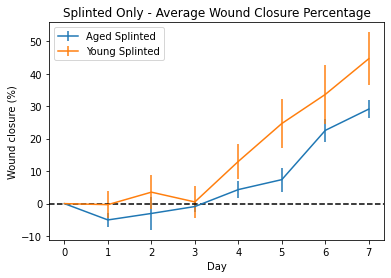

In [ ]:
fig, ax = plt.subplots()
title = "Splinted Only - Average Wound Closure Percentage"
plt.title(title)
x = [0,1,2,3,4,5,6,7]

ax.errorbar(x, agedSplinted["mean"], yerr=agedSplinted["sem"], label="Aged Splinted")
ax.errorbar(x, youngSpinted["mean"], yerr=youngSpinted["sem"], label="Young Splinted")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + " Standard Error.pdf")
plt.show()

###Unsplinted - Aged vs Young

In [ ]:
allUnsplinted = data.loc[data["Side"] == "U"]

In [ ]:
allUnsplinted

,Mouse ID,Day,Side,Predicted area,Predicted diameter,Closure percentage,Age
1,A6-1,0,U,65.132,9.107,0.000,Aged
3,A6-1,1,U,77.423,9.929,-18.871,Aged
5,A6-1,2,U,63.919,9.021,1.862,Aged
7,A6-1,3,U,63.850,9.016,1.968,Aged
9,A6-1,4,U,62.070,8.890,4.701,Aged
...,...,...,...,...,...,...,...
151,Y6-5,3,U,50.992,8.058,17.607,Young
153,Y6-5,4,U,49.790,7.962,19.550,Young
155,Y6-5,5,U,50.371,8.008,18.611,Young
157,Y6-5,6,U,40.661,7.195,34.300,Young


In [ ]:
aggUnsplinted = allUnsplinted.groupby(["Age", "Day"]).agg([np.mean, double_std, sp.sem])

In [ ]:
aggUnsplinted

Predicted area             ... Closure percentage           
                    mean double_std  ...         double_std        sem
Age   Day                            ...                              
Aged  0          71.7378  13.884497  ...           0.000000   0.000000
      1          66.2814  20.082702  ...          35.548315   8.887079
      2          55.7382  16.445482  ...          31.028700   7.757175
      3          52.9018  18.428992  ...          32.753641   8.188410
      4          55.6716  21.867756  ...          37.383686   9.345921
      5          57.8520  23.797861  ...          43.209743  10.802436
      6          49.6684  28.468874  ...          47.216294  11.804073
      7          43.8358  23.633379  ...          39.382640   9.845660
Young 0          62.3900  15.943088  ...           0.000000   0.000000
      1          47.8138   7.372756  ...          20.127529   5.031882
      2          46.5396   6.869534  ...          19.315999   4.829000
      3          47.4520   4.108232  ...          17.507778   4.376944
      4          47.0576   6.702531  ...          15.723215   3.930804
      5          43.6690  22.304258  ...          30.054426   7.513606
      6          36.3142  20.116618  ...          26.930310   6.732577
      7          33.7654  17.882678  ...          22.354584   5.588646

[16 rows x 9 columns]

In [ ]:
aggUnsplinted.to_csv("Unsplinted Only - Mean, 2xSTD, SE.csv")

In [ ]:
closureUnsplinted = aggUnsplinted["Closure percentage"]

In [ ]:
closureUnsplinted

mean  double_std        sem
Age   Day                                
Aged  0     0.0000    0.000000   0.000000
      1     6.6694   35.548315   8.887079
      2    21.3114   31.028700   7.757175
      3    25.3494   32.753641   8.188410
      4    21.3574   37.383686   9.345921
      5    17.8690   43.209743  10.802436
      6    29.1730   47.216294  11.804073
      7    37.4346   39.382640   9.845660
Young 0     0.0000    0.000000   0.000000
      1    22.3568   20.127529   5.031882
      2    24.4370   19.315999   4.829000
      3    22.8936   17.507778   4.376944
      4    23.7928   15.723215   3.930804
      5    30.4536   30.054426   7.513606
      6    42.3094   26.930310   6.732577
      7    46.2918   22.354584   5.588646

In [ ]:
agedUnsplinted = closureUnsplinted.head(8)
youngUnspinted = closureUnsplinted.tail(8)

In [ ]:
agedUnsplinted

mean  double_std        sem
Age  Day                                
Aged 0     0.0000    0.000000   0.000000
     1     6.6694   35.548315   8.887079
     2    21.3114   31.028700   7.757175
     3    25.3494   32.753641   8.188410
     4    21.3574   37.383686   9.345921
     5    17.8690   43.209743  10.802436
     6    29.1730   47.216294  11.804073
     7    37.4346   39.382640   9.845660

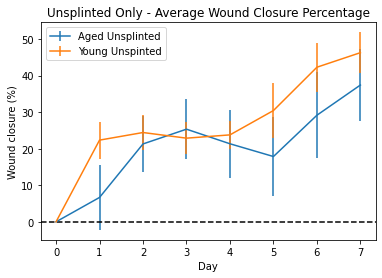

In [ ]:
fig, ax = plt.subplots()
title = "Unsplinted Only - Average Wound Closure Percentage"
plt.title(title)
x = [0,1,2,3,4,5,6,7]

ax.errorbar(x, agedUnsplinted["mean"], yerr=agedUnsplinted["sem"], label="Aged Unsplinted")
ax.errorbar(x, youngUnspinted["mean"], yerr=youngUnspinted["sem"], label="Young Unspinted")

ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Day')
plt.ylabel('Wound closure (%)')
plt.legend(loc='upper left')
plt.savefig("/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Segmentation/Charts/" + title + " Standard Error.pdf")
plt.show()